# Exploração do impacto do COVID-19 em cada país:
## Comparação entre o número de casos confirmados e a população total

# Setup:
## Alteração da pasta do projeto no código em baixo
## Alteração da importação do QGIS no código em baixo

In [1]:
import os
os.chdir("C:\\Users\\Utilizador\\Desktop\\5a\\1\\3WeekDeal\\TP")

In [2]:
import sys
from osgeo import ogr
from qgis.core import *
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		D:\QGIS\apps\qgis-ltr
Prefix:		D:\QGIS\apps\qgis-ltr
Plugin Path:		D:\QGIS\apps\qgis-ltr/plugins
Package Data Path:	D:\QGIS\apps\qgis-ltr/.
Active Theme Name:	
Active Theme Path:	D:\QGIS\apps\qgis-ltr/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	D:\QGIS\apps\qgis-ltr/./svg/
		C:/Users/Utilizador/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	D:\QGIS\apps\qgis-ltr/./resources/qgis.db
Auth DB Path:	C:/Users/Utilizador/AppData/Roaming/python3\profiles\default/qgis-auth.db



# Extração dos casos confirmados por dia em cada país

In [3]:
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", 5)
globalConf = pd.read_csv("global_covid_confirmed.csv")
globalConf = globalConf.rename(columns={"Country/Region": "Country"})
globalConf = globalConf.drop("Lat", axis=1).drop("Long", axis=1)
globalConf["Country"].replace({"US": "United States of America"}, inplace=True)

globalConf = globalConf.groupby('Country').sum()
globalConf = globalConf.sort_values(by=['Country'], ascending=True)
globalConf

,1/22/20,1/23/20,...,4/27/20,4/28/20
Country,,,,,
Afghanistan,0,0,...,1703,1828
Albania,0,0,...,736,750
Algeria,0,0,...,3517,3649
Andorra,0,0,...,743,743
Angola,0,0,...,27,27
Antigua and Barbuda,0,0,...,24,24
Argentina,0,0,...,4003,4127
Armenia,0,0,...,1808,1867
Australia,0,0,...,6721,6744


# Extração da população total em cada país

In [4]:
globalPop = pd.read_csv("C:\\Users\\Utilizador\\Desktop\\5a\\1\\3WeekDeal\\TP\\global_map.csv")
globalPop = globalPop.rename(columns={"SOVEREIGNT": "Country", "POP_EST": "Population"})
globalPop = globalPop[['Country','Population']]

globalPop = globalPop.groupby('Country').sum()
globalPop = globalPop.sort_values(by=['Country'], ascending=True)
globalPop

,Population
Country,
Afghanistan,34124811
Albania,3047987
Algeria,40969443
Andorra,85702
Angola,29310273
Antarctica,4050
Antigua and Barbuda,94731
Argentina,44293293
Armenia,3045191


# Junção entre os casos confirmados e a população total em cada país

In [5]:
globalPopConf = pd.merge(globalPop, globalConf, left_on='Country', right_on='Country')
globalPopConf

,Population,1/22/20,...,4/27/20,4/28/20
Country,,,,,
Afghanistan,34124811,0,...,1703,1828
Albania,3047987,0,...,736,750
Algeria,40969443,0,...,3517,3649
Andorra,85702,0,...,743,743
Angola,29310273,0,...,27,27
Antigua and Barbuda,94731,0,...,24,24
Argentina,44293293,0,...,4003,4127
Armenia,3045191,0,...,1808,1867
Australia,23237428,0,...,6721,6744


# Obtenção do inverso da densidade de casos confirmados em cada país:
## Com a densidade, não é fácil imaginar o impacto do virus, já que é um valor minúsculo de percentagem
## Com o inverso da densidade, fica-se com uma melhor ideia do impacto do virus
## Significa que, num certo país, 1 em cada X pessoas está infetada
## O pior caso é em San Marino, em que 1 em cada 61 pessoas está infetada no último dia

In [6]:
globalPopDens = globalPopConf.copy()
for i in range(1, len(globalPopDens.columns)):
    globalPopDens.iloc[:, i] = round(globalPopDens["Population"]/globalPopDens.iloc[:, i])
globalPopDens = globalPopDens.sort_values(by=['4/28/20'], ascending=True)
globalPopDens

,Population,1/22/20,...,4/27/20,4/28/20
Country,,,,,
San Marino,33537,inf,...,62.0,61.0
Andorra,85702,inf,...,115.0,115.0
Luxembourg,594130,inf,...,159.0,159.0
Iceland,339747,inf,...,190.0,189.0
Qatar,2314307,inf,...,206.0,194.0
Spain,48958159,inf,...,213.0,211.0
Belgium,11491346,inf,...,246.0,243.0
Ireland,5011102,inf,...,255.0,252.0
Switzerland,8236303,inf,...,282.0,281.0


# Cálculo do gráfico do inverso da densidade:
## No caso de Portugal, nota-se uma descida acentuada do valor ao longo dos dias
## No último dia, 1 em cada 446 pessoas está infetada em Portugal.

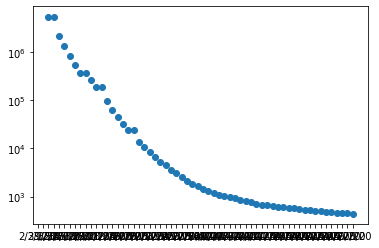

In [7]:
import matplotlib.pyplot as plt
globalDens = globalPopDens.copy().drop("Population", axis=1)
x = globalDens.columns
y = globalDens.loc["Portugal"]
plt.yscale("symlog")
plt.scatter(x, y)

# Abrir GeoPackages do QGIS

In [8]:
globalConfGeo = "layers\\confirmed_amount.gpkg"
conn = ogr.Open(globalConfGeo)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(globalConfGeo, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))

Layer confirmed_amount loaded
Layer layer_styles loaded


In [9]:
globalDensGeo = "layers\\confirmed_density.gpkg"
conn = ogr.Open(globalDensGeo)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(globalDensGeo, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))

Layer confirmed_density loaded
Layer layer_styles loaded


# Fazer render dos mapas das GeoPackages
## Imagem 1 - Casos confirmados no último dia em cada país
## Imagem 2 - Densidade dos casos confirmados no último dia em cada país

In [10]:
globalConfLay = QgsProject.instance().mapLayersByName('confirmed_amount')[0]
xt = globalConfLay.extent()
width  = 1000
height = int(width*xt.height()/xt.width())

options = QgsMapSettings()
options.setLayers([globalConfLay])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)

render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

globalConfLay.renderer()

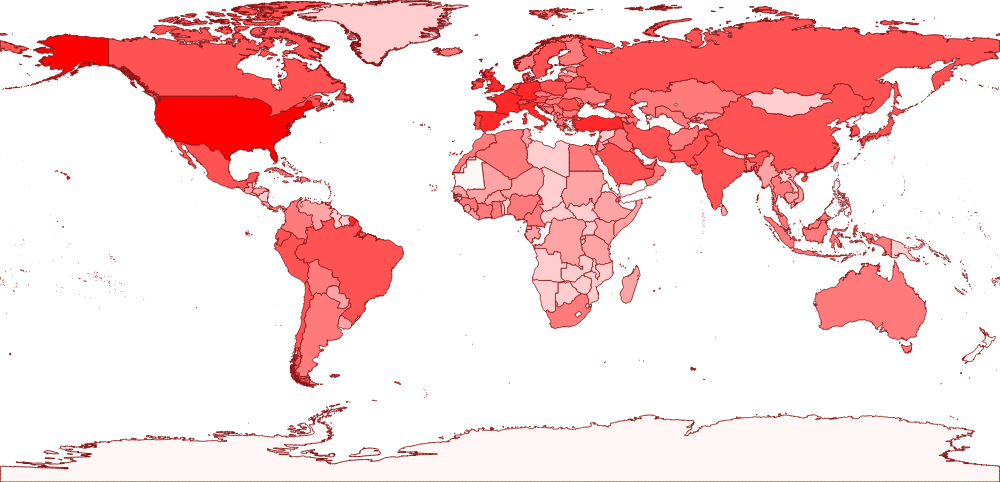

In [11]:
from IPython.display import Image
imgbuf = QBuffer()
imgbuf.open(QIODevice.ReadWrite)
image.save(imgbuf,"PNG")
bufData = imgbuf.data()
globalConfImg = Image(bufData)
globalConfImg

In [12]:
globalDensLay = QgsProject.instance().mapLayersByName('confirmed_density')[0]
xt = globalDensLay.extent()
width  = 1000
height = int(width*xt.height()/xt.width())

options = QgsMapSettings()
options.setLayers([globalDensLay])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)

render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

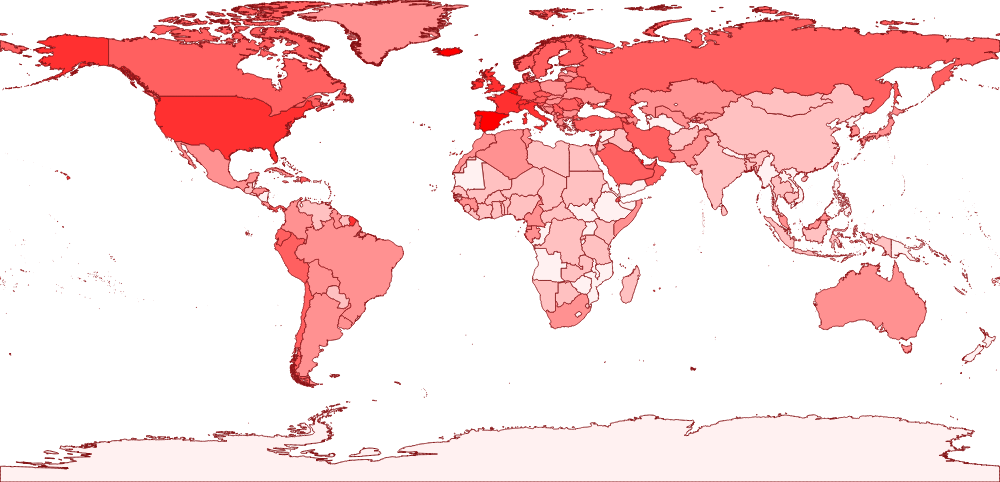

In [13]:
imgbuf = QBuffer()
imgbuf.open(QIODevice.ReadWrite)
image.save(imgbuf,"PNG")
bufData = imgbuf.data()
globalDensImg = Image(bufData)
globalDensImg

# Comparação entre as duas imagens:
## É possível ver que, em países como a China e Índia, apesar de existirem muitos casos confirmados, a densidade de população infetada é baixa, já que a população é muito elevada
## No caso dos países europeus ocidentais e dos Estados Unidos, existem muitos casos confirmados e a densidade de população infetada também é alta
## Para parar a animação, clicar no botão do canto superior direito

<IPython.core.display.Javascript object>


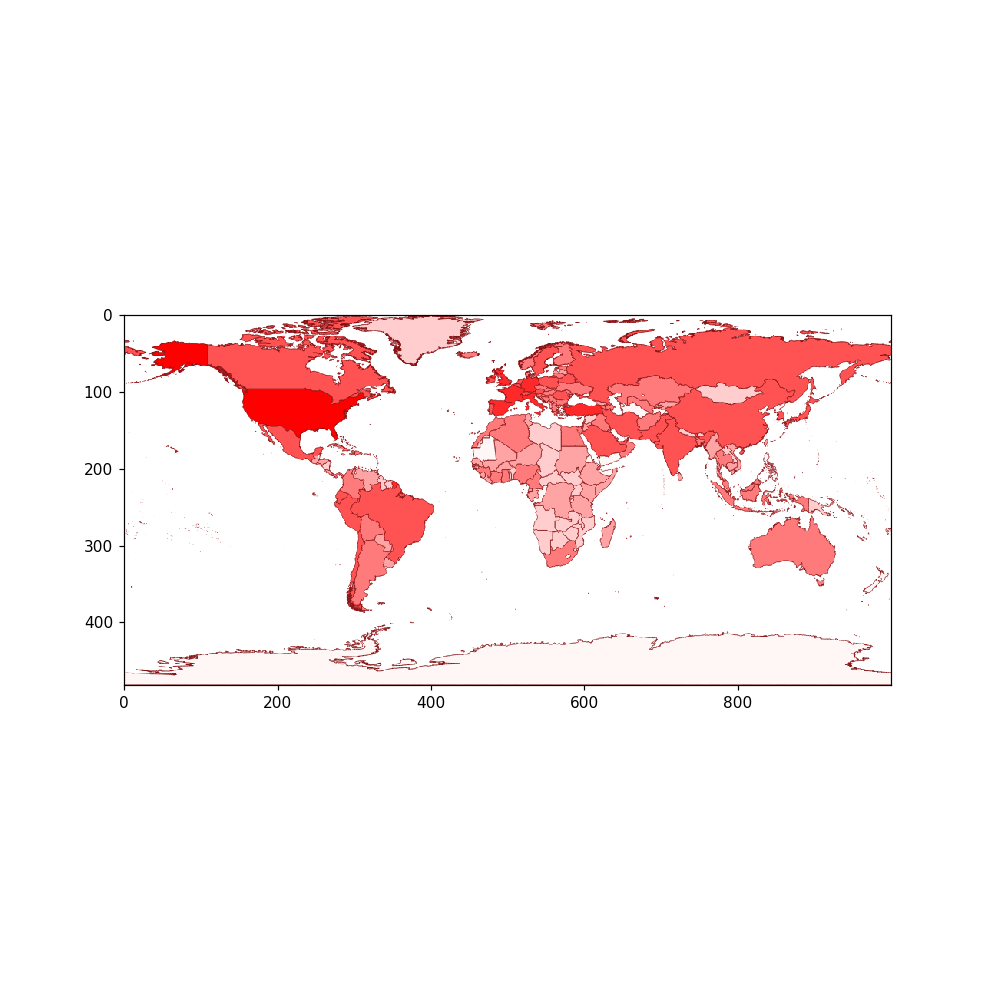

In [14]:
import matplotlib.animation as animation
%matplotlib notebook

with open("img\\1.png", "wb") as png:
    png.write(globalConfImg.data)
with open("img\\2.png", "wb") as png:
    png.write(globalDensImg.data)

img1 = plt.imread("img\\1.png")
img2 = plt.imread("img\\2.png")
fig = plt.figure(figsize = (9,9))
display = plt.imshow(img1, animated=True)

def update(i):
    if i % 2 == 0:
        display.set_data(img1)
    else:
        display.set_data(img2)

ani = animation.FuncAnimation(fig, update, frames=2, interval=1000, repeat=True)
plt.show()